# Part I - Global Causes of Death Data Exploration
## by John Ametepe Agboku

## Introduction
> This dataset from Udacity servers contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and other variables from Prosper. 


## Preliminary Wrangling
The document investigates a dataset containing interest rates, the loan amount the delinquencies and other attributes for 113,937 loans.

In [418]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from mock.mock import inplace
%matplotlib inline

## Data Gathering

In [419]:
#load data into pandas dataframe
loans = pd.read_csv("prosperLoanData.csv")

## Assesing

In [420]:
print(f'Shape = {loans.shape}')


Shape = (113937, 81)


In [421]:
#getting a description of the whole dataset
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [422]:
#getting a descriptive statistics of the numeric data in the dataset
loans.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [423]:
#convert prosperRating(Alpha) into ordered categorical types using ProsperRatingNumeric
rating = ["N/A","HR","E","D","C","B","A","AA"]
ordered_rating = pd.api.types.CategoricalDtype(ordered=True,
                                               categories=rating)
loans["ProsperRating (Alpha)"] = loans["ProsperRating (Alpha)"].astype(ordered_rating)

In [424]:
loans["ProsperRating (Alpha)"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 113937 entries, 0 to 113936
Series name: ProsperRating (Alpha)
Non-Null Count  Dtype   
--------------  -----   
84853 non-null  category
dtypes: category(1)
memory usage: 111.7 KB


In [425]:
#convert LoanOriginationDate into Datetime variable type
loans["LoanOriginationDate"] = loans["LoanOriginationDate"].astype(np.Datetime64)

From the Data Dictionary, the variables like ProsperRating and ProsperScore has values for loans which originated after July 2009
In order to make an unbiased analysis when analysing using features like ProsperRating etc, the data set will be divided into two i.e.
#### The original dataset and the dataset with loans that originated after July 2009



### What is the structure of your dataset?

> There 113,937 loans in the dataset with 81 features. With almost 90 percent of the data being numeric Variables like ProsperRating are categorical in nature.

### What is/are the main feature(s) of interest in your dataset?

> My interest is to identify which variables determines the loan amount and also identify the variables that determines the delinquencies and which periods had the highest delinquencies and what are their features?
> Lastly, I want to findout whether there has been a significant changes between Current delinquencies and last 7 years delinquencies.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> 10 features will be used to investigate the features of interest. i.e.
1. LoanOriginationDate
2. Term
3. BorrowerRate
4. LoanOriginalAmount
5. IncomeRange
6. CurrentDelinquencies
7. DelinquenciesLast7years
8. ProsperRating (Alpha)
9. Occupation
10. EmploymentStatus
11. IsBorrowerHomeowner
12. MonthlyLoanPayment
13. LoanStatus
14. ProsperScore

> I expect occupation, term, income range and employment status determines the loan amount.
> Client with high IncomeRange and are employed are expected to get high loan amounts because their risk of not paying is low or defaulting on the loan thus will be expected to have low Delinquencies
> Also, the occupation of a client determines their IncomeRange thus determining the loan amount they can receive and also their chances of defaulting
> The MonthlyPayment and the loan term also determines delinquencies. I expect loans with low MonthlyPayment and also long terms have low delinquencies and vice versa
> Homeowners  have mortgages to pay thus might default on loans thus I expect homeowners to high delinquencies




In [426]:
#stripping the data set down to only the features of interest
columns_to_keep = ["IsBorrowerHomeowner","Term","BorrowerRate","LoanOriginationDate", "IncomeRange","CurrentDelinquencies","DelinquenciesLast7Years","ProsperRating (Alpha)","Occupation","EmploymentStatus","MonthlyLoanPayment","LoanStatus","ProsperScore","LoanOriginalAmount"]

loans = loans[columns_to_keep]

In [427]:
loans.describe()

,Term,BorrowerRate,CurrentDelinquencies,DelinquenciesLast7Years,MonthlyLoanPayment,ProsperScore,LoanOriginalAmount
count,113937.000000,113937.000000,113240.000000,112947.000000,113937.000000,84853.000000,113937.00000
mean,40.830248,0.192764,0.592052,4.154984,272.475783,5.950067,8337.01385
std,10.436212,0.074818,1.978707,10.160216,192.697812,2.376501,6245.80058
min,12.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1000.00000
25%,36.000000,0.134000,0.000000,0.000000,131.620000,4.000000,4000.00000
50%,36.000000,0.184000,0.000000,0.000000,217.740000,6.000000,6500.00000
75%,36.000000,0.250000,0.000000,3.000000,371.580000,8.000000,12000.00000
max,60.000000,0.497500,83.000000,99.000000,2251.510000,11.000000,35000.00000


In [428]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   IsBorrowerHomeowner      113937 non-null  bool          
 1   Term                     113937 non-null  int64         
 2   BorrowerRate             113937 non-null  float64       
 3   LoanOriginationDate      113937 non-null  datetime64[ns]
 4   IncomeRange              113937 non-null  object        
 5   CurrentDelinquencies     113240 non-null  float64       
 6   DelinquenciesLast7Years  112947 non-null  float64       
 7   ProsperRating (Alpha)    84853 non-null   category      
 8   Occupation               110349 non-null  object        
 9   EmploymentStatus         111682 non-null  object        
 10  MonthlyLoanPayment       113937 non-null  float64       
 11  LoanStatus               113937 non-null  object        
 12  ProsperScore    

From the data dictionary from ProsperLoans, some features such as ProsperRating etc. have origination after july 2009. Thus to make the analysis of these features unbiased, we are going to look at loans with ProsperRating.

In [429]:
#the dataframe with loans that originated after july 2009
loans = loans[~loans['ProsperScore'].isna() & ~loans['ProsperRating (Alpha)'].isna()]
loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 1 to 113936
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   IsBorrowerHomeowner      84853 non-null  bool          
 1   Term                     84853 non-null  int64         
 2   BorrowerRate             84853 non-null  float64       
 3   LoanOriginationDate      84853 non-null  datetime64[ns]
 4   IncomeRange              84853 non-null  object        
 5   CurrentDelinquencies     84853 non-null  float64       
 6   DelinquenciesLast7Years  84853 non-null  float64       
 7   ProsperRating (Alpha)    84853 non-null  category      
 8   Occupation               83520 non-null  object        
 9   EmploymentStatus         84853 non-null  object        
 10  MonthlyLoanPayment       84853 non-null  float64       
 11  LoanStatus               84853 non-null  object        
 12  ProsperScore             84853 

In [430]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 1 to 113936
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   IsBorrowerHomeowner      84853 non-null  bool          
 1   Term                     84853 non-null  int64         
 2   BorrowerRate             84853 non-null  float64       
 3   LoanOriginationDate      84853 non-null  datetime64[ns]
 4   IncomeRange              84853 non-null  object        
 5   CurrentDelinquencies     84853 non-null  float64       
 6   DelinquenciesLast7Years  84853 non-null  float64       
 7   ProsperRating (Alpha)    84853 non-null  category      
 8   Occupation               83520 non-null  object        
 9   EmploymentStatus         84853 non-null  object        
 10  MonthlyLoanPayment       84853 non-null  float64       
 11  LoanStatus               84853 non-null  object        
 12  ProsperScore             84853 

 ## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualization.**


In [431]:
#function to plot histogram

def plot_hist(column, bins):
    plt.figure(figsize=[8,5])
    plt.hist(data=loans, x=column, bins = bins)
    plt.xlabel(column)

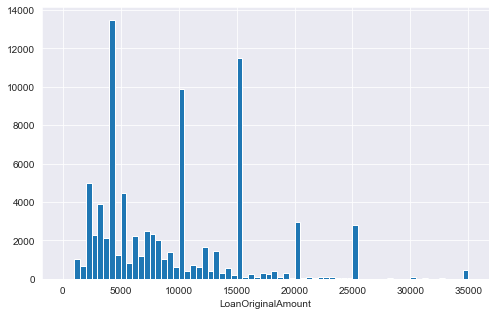

In [432]:
#Starting with the loan amount to findout its distribution
binsize = 500
bins = np.arange(0, loans['LoanOriginalAmount'].max()+binsize, binsize)
plot_hist("LoanOriginalAmount",bins)

From the plots above, it can be seen that the loans are right skewed. That is there are more loans less than 5000 and between 5000 and 10000. And only few loans between 20000 and 25000 and from 25000 to 35000. There seem to be a high peak loan between 0 and 5000 and also at 10000 and 15000. Let's take another look at it again and this time with a log transformation of the axis.


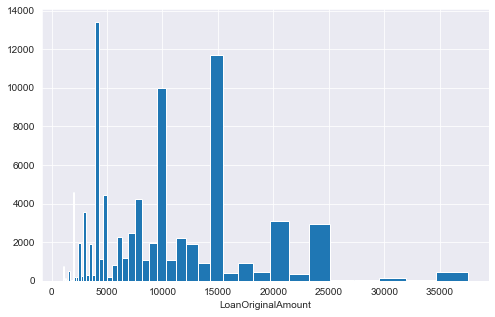

In [433]:
log_binsize = 0.035
bins = 10 ** np.arange(3, np.log10(loans.LoanOriginalAmount.max())+log_binsize, log_binsize)
plot_hist("LoanOriginalAmount",bins)

Text(0.5, 0, 'Current Delinquencies')

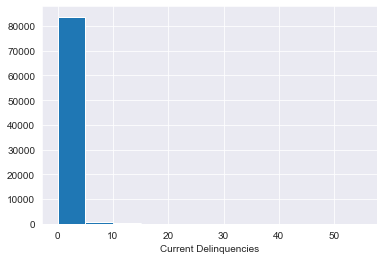

In [434]:
binsize=5
bins= np.arange(0, loans['CurrentDelinquencies'].max()+binsize, binsize)
plt.hist(data=loans, x="CurrentDelinquencies", bins=bins)
plt.xlabel('Current Delinquencies')


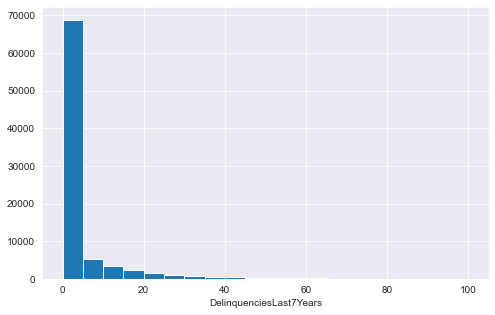

In [435]:
binsize=5
bins= np.arange(0, loans['DelinquenciesLast7Years'].max()+binsize, binsize)
plot_hist('DelinquenciesLast7Years', bins)

Looking at the plots of the current and last 7 years delinquencies, they are both skewed to the right but with current delinquencies having less distribution has compared to delinquencies. This shows there is an interesting insight to investigate between the two.

In [436]:
#Converting term into categorical data type
loans['Term'] = loans['Term'].astype(pd.CategoricalDtype(ordered=True))
loans.Term

1         36
3         36
4         36
5         60
6         36
          ..
113932    36
113933    36
113934    60
113935    60
113936    36
Name: Term, Length: 84853, dtype: category
Categories (3, int64): [12 < 36 < 60]

Text(0.5, 0, 'Term (Months)')

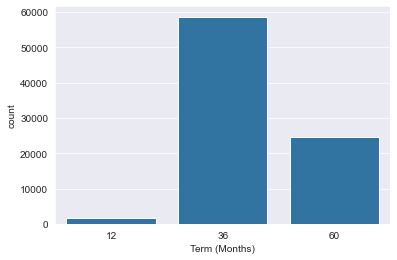

In [437]:
#plotting a bar chart for the term feature of the dataset
base_color = sb.color_palette()[0]
sb.countplot(data=loans, x= 'Term', color=base_color)
plt.xlabel("Term (Months)")

As seen above, there are three different terms,12 months, 36 months, and 60 months with 36 months having the highest count

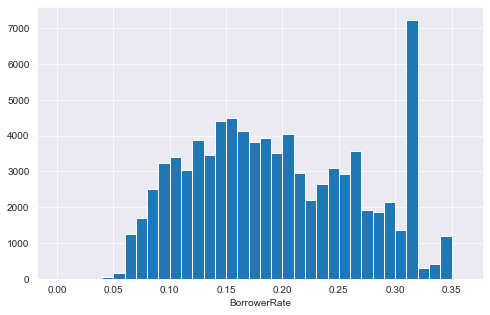

In [438]:
#plotting a distribution plot of BorrowerRate feature
binsize = 0.01
bins = np.arange(0, loans.BorrowerRate.max()+binsize, binsize)
plot_hist("BorrowerRate",bins)

There is a spike between 0.3 and 0.35 approximately and more the borrower rates seems to be on the low interest end.

In [439]:
#converting the IncomeRange into ordered categorical dtypes
range_list = ['Not displayed','Not employed','$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+']

ordered_range = pd.api.types.CategoricalDtype(ordered=True, categories=range_list)
loans['IncomeRange'] = loans['IncomeRange'].astype(ordered_range)

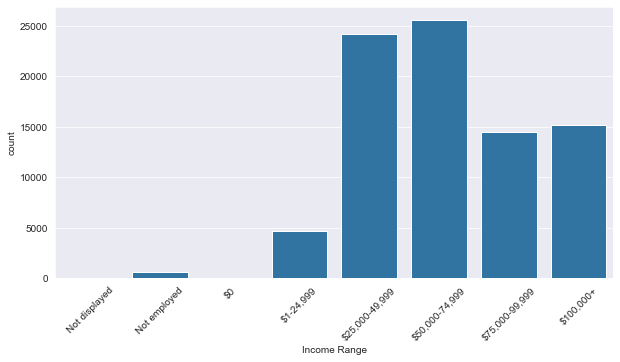

In [440]:
plt.figure(figsize=[10,5])
sb.countplot(data=loans, x='IncomeRange', color=base_color)
plt.xlabel("Income Range")
plt.xticks(rotation=45);

The chart shows income ranges $ 25,000 - 49,999 and $50,000-74,999 has the highest count as compared to the others and Not employed and $$0 having the least count. However, there are a significant count of Not displayed value. The Income Range was Ordered from Not displayed to $100,000

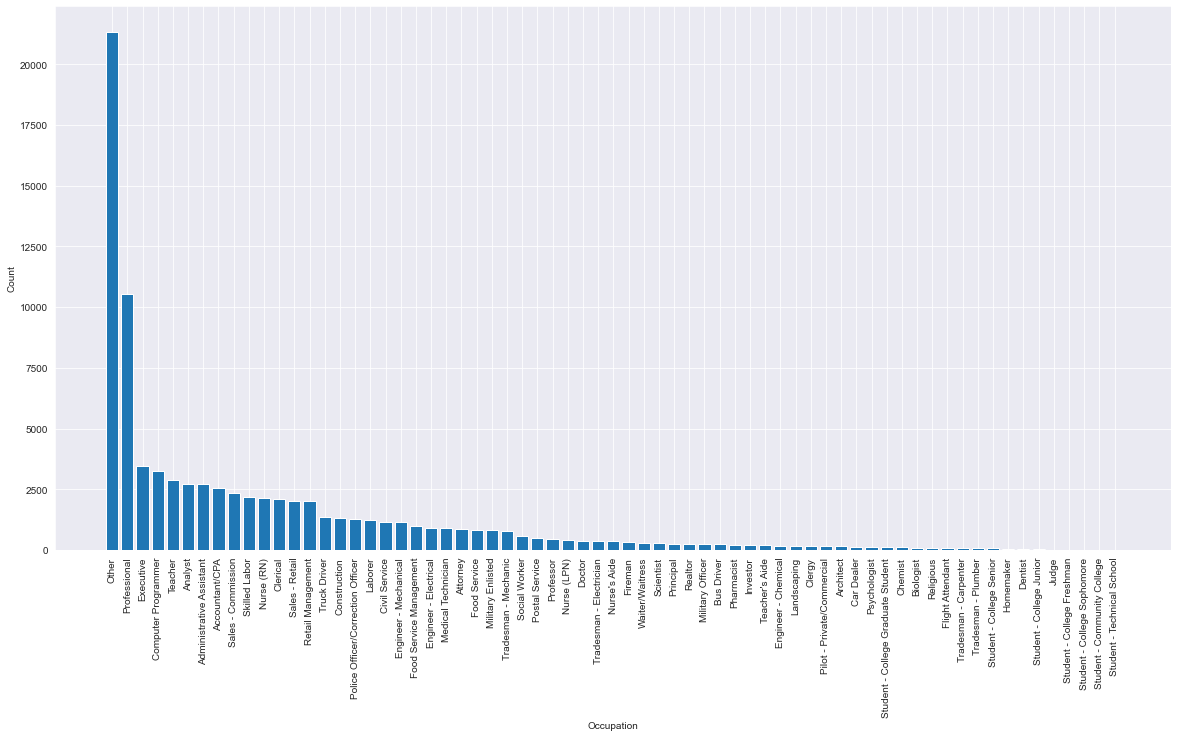

In [441]:
plt.figure(figsize=[20,10])
occupations = loans['Occupation'].value_counts()
plt.bar(data=occupations,x=occupations.index, height=occupations.values)
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.xticks(rotation =90);


The chart shows Other as having the highest occupation count which includes different kinds of unspecified occupation and also the next highest is Professional which is also vague because anyone can be professional can be related to any other occupation. However, the highest specified occupation type is Computer Programmer with the least being Student-Technical School. Because of the vagueness of some occupations, it will be safe to drop the Occupation feature, so as not to make vague conclusions.

In [442]:
loans.drop(columns ="Occupation", inplace=True)

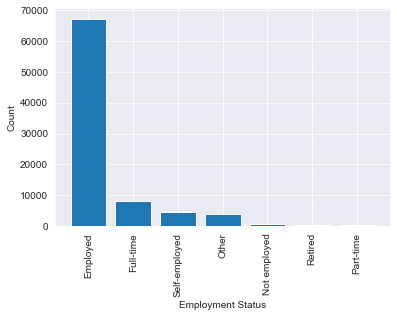

In [443]:
#Convert EmploymentStatus to category dtype
loans.EmploymentStatus = loans.EmploymentStatus.astype('category')
#plotting a bar chart of the employment status
employment_status = loans['EmploymentStatus'].value_counts()
plt.bar(x=employment_status.index, height=employment_status.values)
plt.xlabel("Employment Status")
plt.ylabel("Count")
plt.xticks(rotation=90);

Most of the borrowers are employed and also the least employment status is retired.

Text(0.5, 0, 'Monthly Loan Payment')

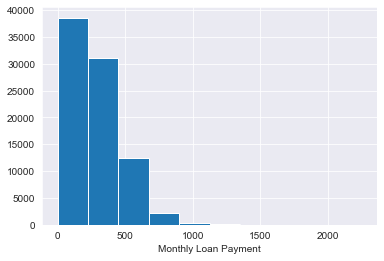

In [444]:
#plotting to the Monthly loan Payment to see how the values are distributed.
plt.hist(data=loans, x='MonthlyLoanPayment');
plt.xlabel("Monthly Loan Payment")

There seem to be a long tail at right end of the distribution. And the values are right skewed. I'm taking a second look this time with smaller bins to gain more insights into the distribution

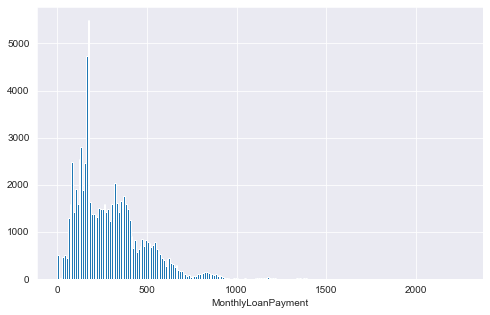

In [445]:
#plotting MonthlyLoanPayment chart with smaller bins
binsize = 10
bins = np.arange(0, loans['MonthlyLoanPayment'].max()+binsize,binsize)
plot_hist('MonthlyLoanPayment', bins)

With Monthly Loan Payment, the small size bins shows a right skewed distribution having most of the payments concentrated between 0 and 500 dollars and there the values dwindle very significantly. Which needs to be looked at.

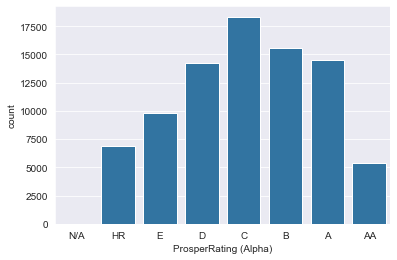

In [446]:
#plotting a bar chart of the ProsperRating (Alpha) using the second part of the dataset i.e. The loans dataset after July 2009
sb.countplot(data=loans, x = 'ProsperRating (Alpha)' , color=base_color);

The ProsperRating (Alpha) shows most loans having a C rating with B as the next highest rating and AA having the least rating.

C:\Users\johna\anaconda3\anaconda31\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)


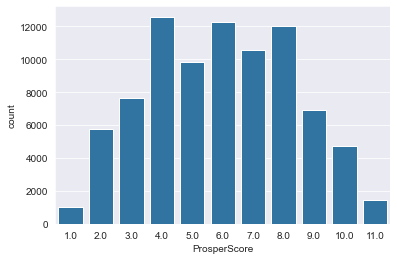

In [447]:
#plotting the bar chart of the Prosper Score
loans['ProsperScore'] = loans['ProsperScore'].astype(pd.CategoricalDtype(ordered=True))
sb.countplot(data=loans, x="ProsperScore", color=base_color);

The ProsperScore is a risk score that starts from 1 to 11, the higher the score the lower the risk and vice versa. And from the chart, it shows the most of the risk score is from 4.0 to 8.0 With very high risk loans being fewer than low risk loans

<AxesSubplot:xlabel='count', ylabel='LoanStatus'>

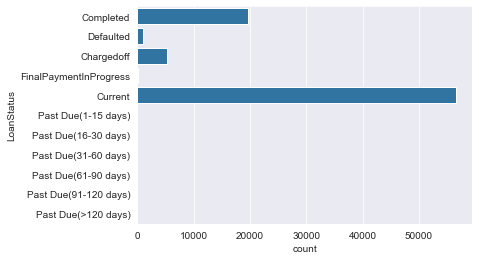

In [448]:
#converting loan status into category dtype
status = ['Completed','Defaulted','Chargedoff', 'FinalPaymentInProgress','Current','Past Due(1-15 days)','Past Due(16-30 days)','Past Due(31-60 days)', 'Past Due(61-90 days)','Past Due(91-120 days)','Past Due(>120 days)']
status_cat = pd.api.types.CategoricalDtype(categories=status, ordered=True)
loans['LoanStatus']  = loans['LoanStatus'].astype(status_cat)
sb.countplot(data=loans, y='LoanStatus', color=base_color)

(0.0, 100000.0)

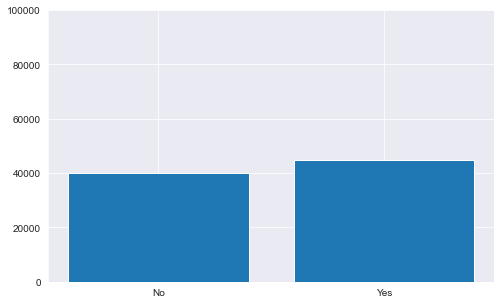

In [449]:
isBorrowerHomeOwner = loans['IsBorrowerHomeowner'].value_counts().sort_values()
plt.figure(figsize=[8,5])
plt.bar(height=isBorrowerHomeOwner.values, x=isBorrowerHomeOwner.index)
plt.xticks([0,1], ["No","Yes"])
plt.ylim(0,100000)


The difference between the homeowners and non homeowners is very small. Let's take a look at it again in a new graph this time with values noted on them.


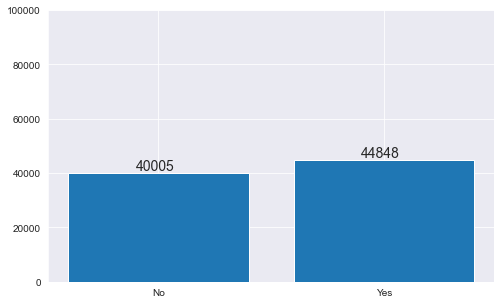

In [450]:
plt.figure(figsize=[8,5])
bars = plt.bar(height=isBorrowerHomeOwner.values, x=isBorrowerHomeOwner.index)
plt.xticks([0,1], ["No","Yes"])
plt.ylim(0,100000)

for bar in bars:
    value = bar.get_height()
    plt.text(bar.get_x()+0.30, value+1000, value, fontdict={
        'fontsize':14
    })

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
> The LoanOriginalAmount are right skewed, so i zoomed in using log transformation to plot smaller bins and under the transformation , the data shows to be concentrated between 0 and \$5000 and within this interval lies an unimodal, however there are visible peaks from 5000 to 10000 and also from 10000 to 15000. Again there seem to be no data points between 25000 and 30000.
### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
> From investigating the datasets, there were no unusual distributions however, from the data dictionary some features like ProsperRating(Alpha) and ProsperScore etc. have records after July 2009 so make an unbiased analysis and conclusion, we take rows with non-null ProsperScore. i.e. I removed rows with null ProsperScore or ProsperRating (Alpha). Also, the Occupation feature contains vague values so i dropped them so as not to make vague conclusions.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).
> I will first look at how the features of interest changes with time. And how the features corrleate with each other

In [451]:
#function to create timeseries plot

def plt_timeseries(column, ylabel ="", freq = 'M'):
    df = loans[['LoanOriginationDate', column]]
    df.set_index("LoanOriginationDate", inplace=True)
    df = df.groupby(pd.Grouper(freq=freq)).sum()
    df.plot()
    plt.ylabel(ylabel)

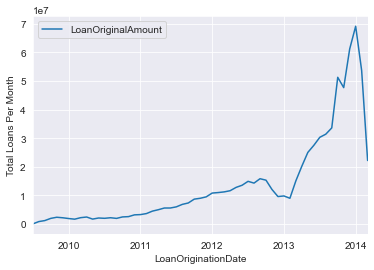

In [452]:
#timeseries plot of loanOriginalAmount over months
#creating new dataframe with only LoanOriginationDate and LoanOriginalAmount
plt_timeseries("LoanOriginalAmount","Total Loans Per Month")


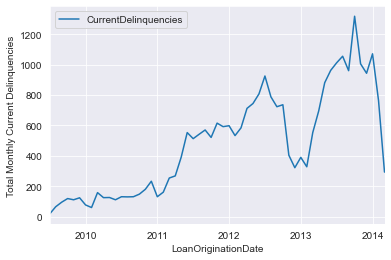

In [453]:
#plotting current delinquencies per month
plt_timeseries('CurrentDelinquencies',"Total Monthly Current Delinquencies")

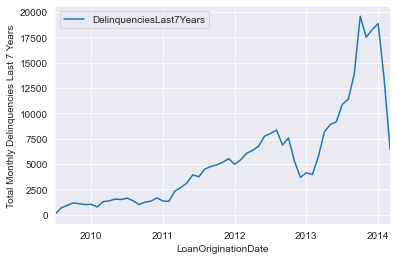

In [454]:
#plotting delinquencieslast 7 years per month
plt_timeseries('DelinquenciesLast7Years',"Total Monthly Delinquencies Last 7 Years")

Next let us take a look at how the features of interest vary with the other features in the dataset the features with one another

In [455]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 1 to 113936
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   IsBorrowerHomeowner      84853 non-null  bool          
 1   Term                     84853 non-null  category      
 2   BorrowerRate             84853 non-null  float64       
 3   LoanOriginationDate      84853 non-null  datetime64[ns]
 4   IncomeRange              84853 non-null  category      
 5   CurrentDelinquencies     84853 non-null  float64       
 6   DelinquenciesLast7Years  84853 non-null  float64       
 7   ProsperRating (Alpha)    84853 non-null  category      
 8   EmploymentStatus         84853 non-null  category      
 9   MonthlyLoanPayment       84853 non-null  float64       
 10  LoanStatus               82786 non-null  category      
 11  ProsperScore             84853 non-null  category      
 12  LoanOriginalAmount       84853 

In [456]:
numeric_vars = [column for column in loans.columns if loans[column].dtype == 'float64' or loans[column].dtype == 'int64']

categorical_vars = [column for column in loans.columns if loans[column].dtype == 'category']
categorical_vars

['Term',
 'IncomeRange',
 'ProsperRating (Alpha)',
 'EmploymentStatus',
 'LoanStatus',
 'ProsperScore']

<AxesSubplot:>

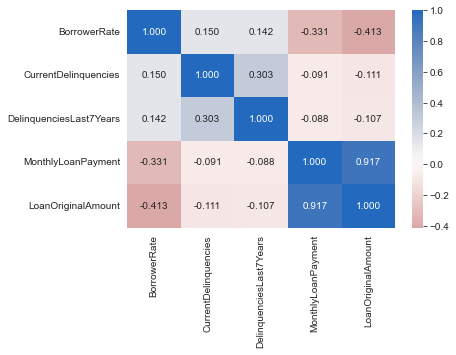

In [457]:
#Correaltion matrix
sb.heatmap(loans[numeric_vars].corr(), annot=True, fmt='.3f', center=0, cmap='vlag_r')

loans.shape= (84853, 13)
loans_sample.shape= (1000, 13)


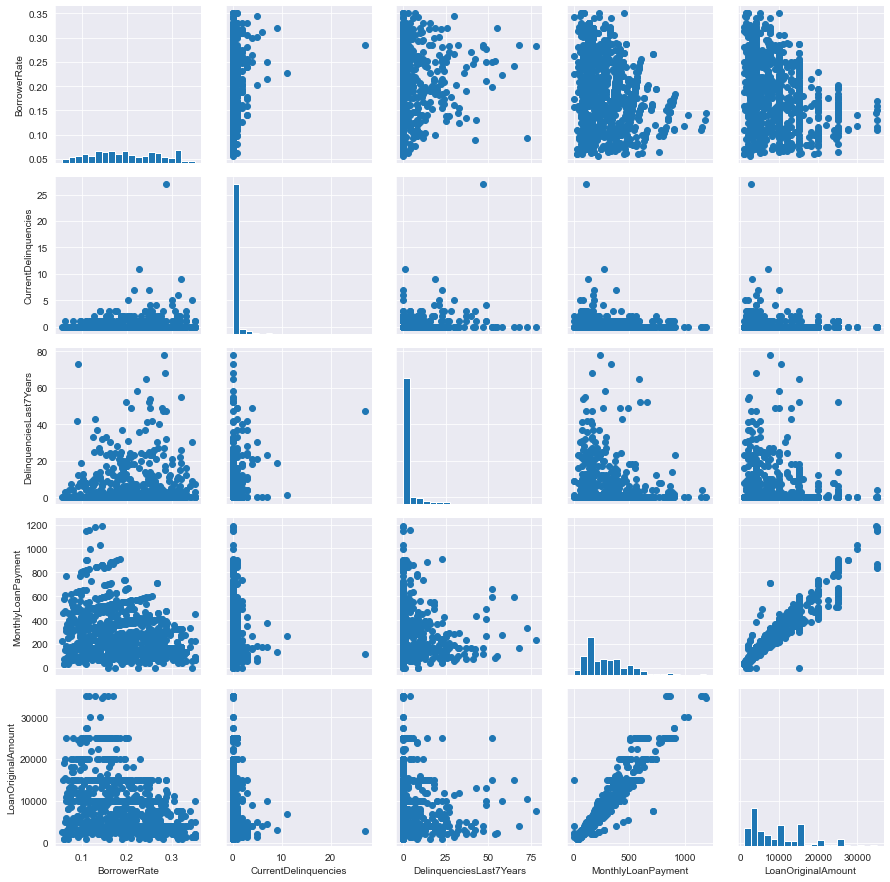

In [458]:
#plot matrix: Taking a sample of 1000 for fast plotting and rendering.
#plotting numeric features against each other
print("loans.shape=", loans.shape)
loans_samp = loans.sample(n=1000, replace=False)
print("loans_sample.shape=", loans_samp.shape)
g = sb.PairGrid(data=loans_samp, vars=numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

The only features that are highly correlated with each other are the LoanOriginalAmount and MonthlyLoanPayment which is not a surprise because when you take high loans you are expected to pay higher payments.
In contrast to the other features they have low or no significant correlation with each other. I was expecting CurrentDelinquencies and DelinquenciesLast7Years should have a high negative correlation with LoanOriginalAmount, however, though they have negative correlation, there correlation coefficient is very low.
Moreover, the BorrowerRate also has a negative relationship with the LoanOriginalAmount. I was expecting if not high, least a 50 percent correlation between LoanOriginalAmount because, the BorrowerRate is like the cost of taking the Loan, the lower the rate, the cheaper the loan. Now with an approximate of 45 percent correlation means, though the BorrowerRate explains 45 percent variability in the LoanOriginalAmount, there are factors that defines a borrower taking a loan than the BorrowerRate.
Much focus of the analyses will be on MonthlyLoanPayment and BorrowerRate as they seem to define the LoanOriginalAmount than the rest of the numeric variables.

Moving on to the categorical features and numeric features o see if there is any relationship between them

C:\Users\johna\anaconda3\anaconda31\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)
C:\Users\johna\anaconda3\anaconda31\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)
C:\Users\johna\anaconda3\anaconda31\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)
C:\Users\johna\anaconda3\anaconda31\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)
C:\Users\johna\anaconda3\anaconda31\lib\site-packages\seaborn\ca

<Figure size 720x720 with 0 Axes>

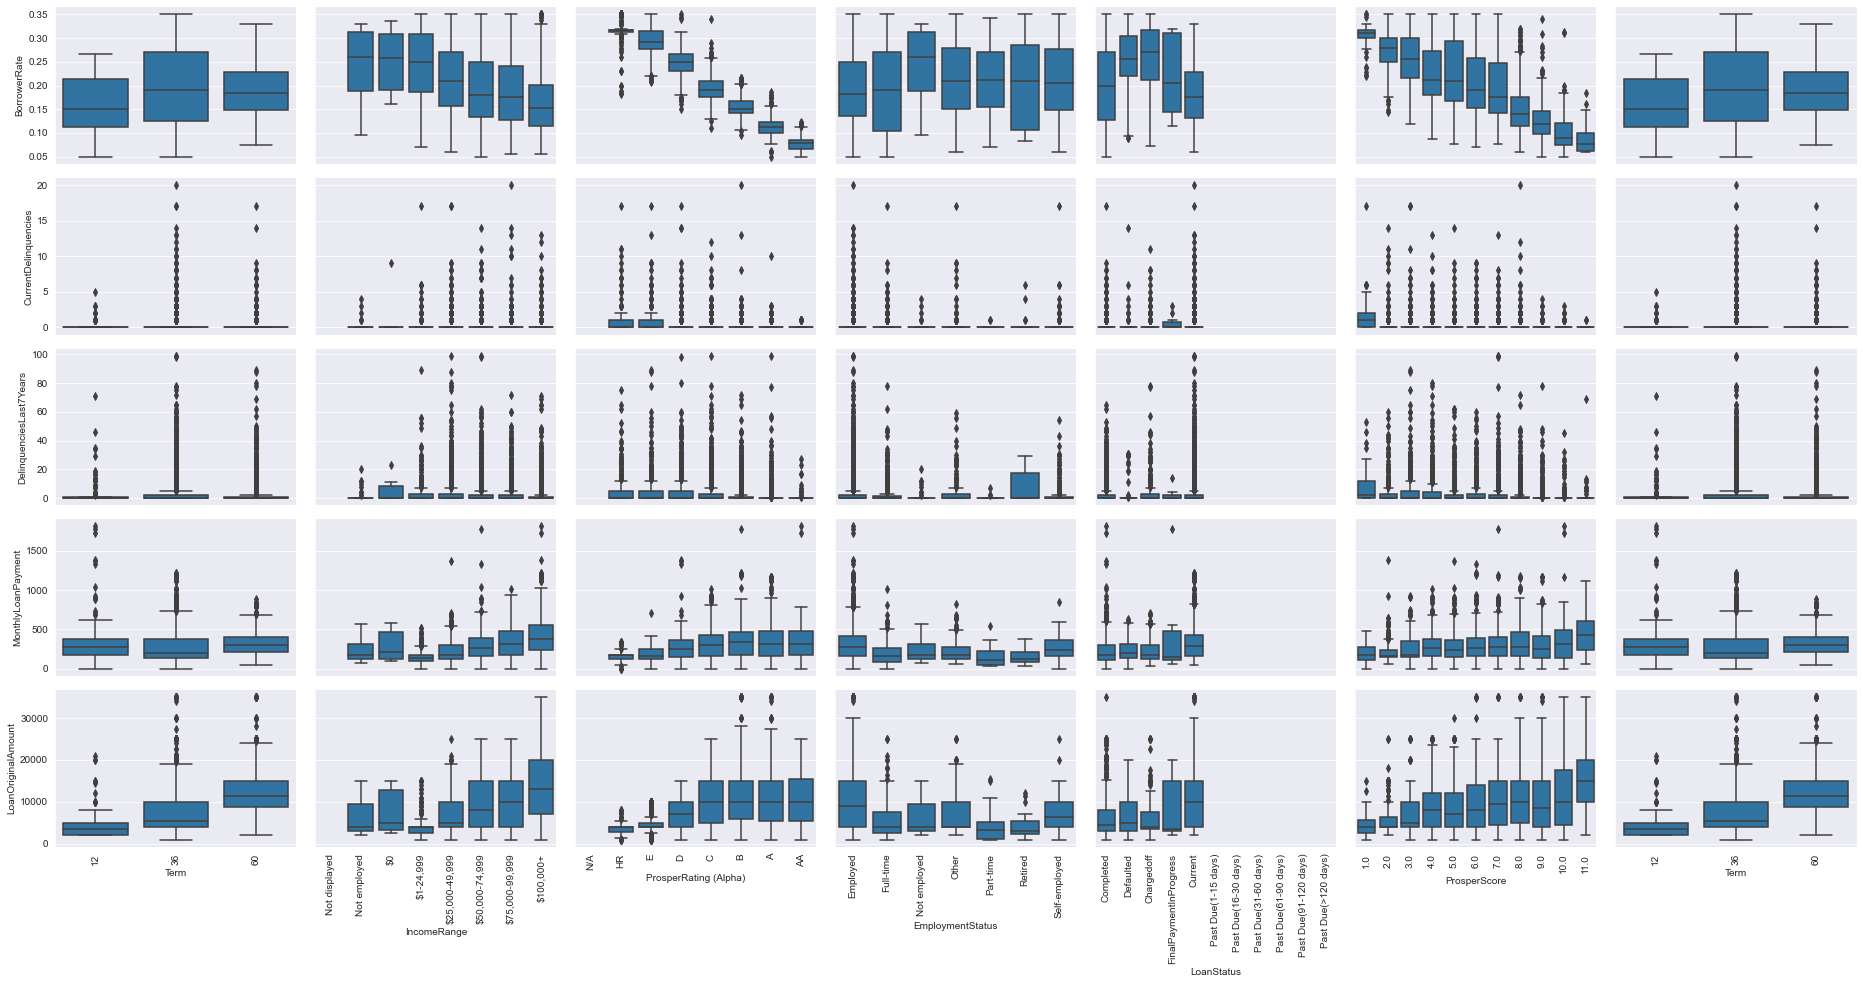

In [459]:
#plot matrix of numeric features against categorical features
#using a sample of 5000

loans_samp = loans.sample(n=5000, replace=False)

#source code : Udacity Example Project Diamonds
def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x=x, y=y, color=default_color)
    plt.xticks(rotation=90)

plt.figure(figsize=[10,10])
g = sb.PairGrid(data=loans_samp, y_vars=numeric_vars, x_vars=categorical_vars+["Term"], aspect=1.5)
g.map(boxgrid)
plt.show();

As expected, there is no visible relationship between Term and the both Delinquencies features because those features had no significant correlation with LoanOriginalAmount. Also, it can be seen that as the loan increases, the term also increases which is also much expected.
Further, employed people has high loans because, they are working and have the ability to pay as compared to people who are not employed and this is evidently shown in the MonthlyLoanPayment chart with employed having the highest payments.
The IncomeRange, ProsperScore and ProsperRating (Alpha) also has a positive correlation with LoanOriginalAmount and MonthlyLoanPayment but has a negative correlation with the BorrowerRate.
Interestingly, as the loan amount increases, the Prosper score also increases, which means huge loans have lower risk than small loans.



Taking a look at the relationship between the three categorical features

C:\Users\johna\anaconda3\anaconda31\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)
C:\Users\johna\anaconda3\anaconda31\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)


<AxesSubplot:xlabel='ProsperRating (Alpha)', ylabel='count'>

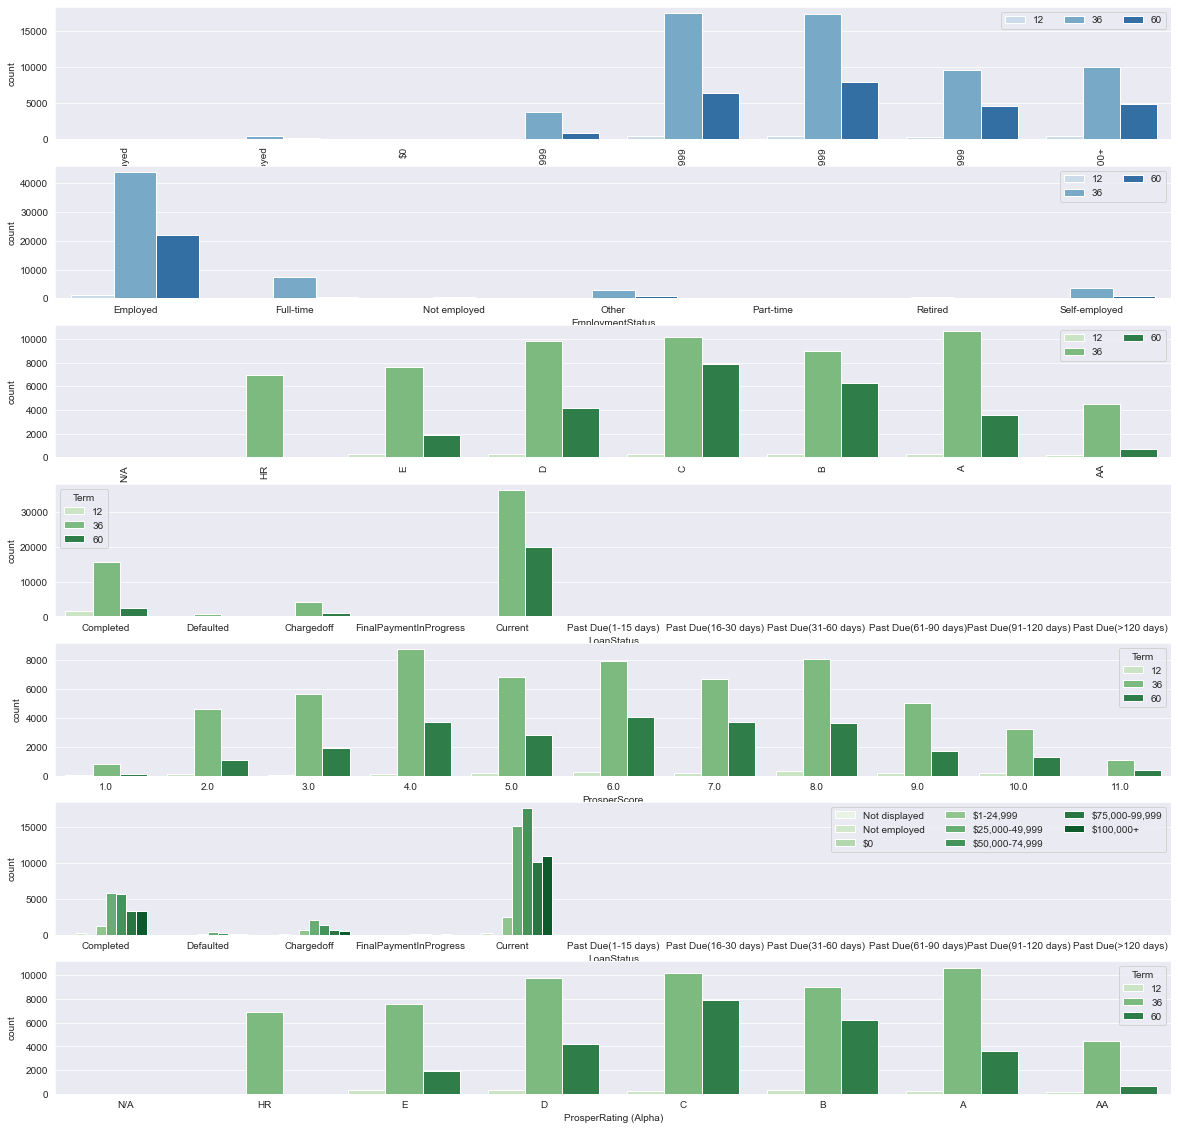

In [460]:
#The plots are simple thus using the entire data will not cause slow rendering
plt.figure(figsize = [20, 20])

#subplot 1
ax = plt.subplot(7,1,1)
sb.countplot(data=loans, x ="IncomeRange" , hue='Term', palette='Blues')
ax.legend(loc = 1, ncol=4)
plt.xticks(rotation=90);

#subplot 2
ax = plt.subplot(7,1,2)
sb.countplot(data=loans, x = 'EmploymentStatus', hue='Term', palette='Blues')
ax.legend(ncol=2)

#subplot 3
ax = plt.subplot(7,1,3)
sb.countplot(data=loans, x = 'ProsperRating (Alpha)'
             , hue='Term', palette='Greens')
ax.legend(loc =1, ncol=2)
plt.xticks(rotation=90);

#subplot 4
ax = plt.subplot(7,1,4)
sb.countplot(data=loans, x='LoanStatus', hue='Term',palette='Greens')

#subplot 5
ax = plt.subplot(7,1,5)
sb.countplot(data=loans, x = 'ProsperScore'
             , hue='Term', palette='Greens')

#subplot 6
ax = plt.subplot(7,1,6)
sb.countplot(data=loans, hue = 'IncomeRange'
             , x='LoanStatus', palette='Greens')
ax.legend(loc=1, ncol=3)
#subplot 7
ax = plt.subplot(7,1,7)
sb.countplot(data=loans, x = 'ProsperRating (Alpha)'
             , hue='Term', palette='Greens')


From the plots, there are larger interactions  on the  months and the features. Also, the 36-month term loans have the highest risk looking at the ProsperScore. The 36-month term loan is the most popular loan value among all the features with 60-month loan as the next popular.

I want to look more into the relationships between the MonthlyLoanPayment , BorrowerRate and other categorical features.

I am going to look into the relationship between LoanOriginalAmount and MonthlyLoanPayment

Text(0, 0.5, 'LoanOriginalAmount')

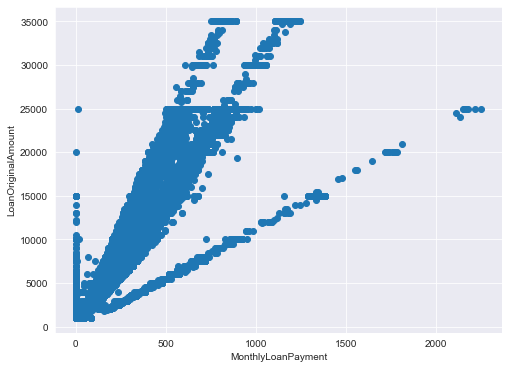

In [461]:
#Scatter plot of LoanOriginalAmount and MonthlyLoanPayment

plt.figure(figsize=[8,6])
plt.scatter(data= loans, x= 'MonthlyLoanPayment', y='LoanOriginalAmount')
plt.xlabel("MonthlyLoanPayment")
plt.ylabel("LoanOriginalAmount")

Text(0, 0.5, 'LoanOriginalAmount')

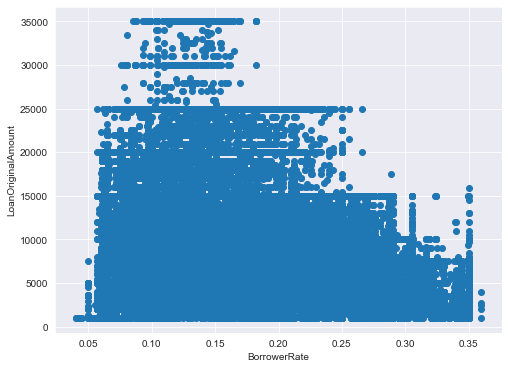

In [462]:
#Scatter plot of LoanOriginalAmount and BorrowerRate
plt.figure(figsize=[8,6])
plt.scatter(data= loans, x= 'BorrowerRate', y='LoanOriginalAmount')
plt.xlabel("BorrowerRate")
plt.ylabel("LoanOriginalAmount")

C:\Users\johna\anaconda3\anaconda31\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)
C:\Users\johna\anaconda3\anaconda31\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)
C:\Users\johna\anaconda3\anaconda31\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)


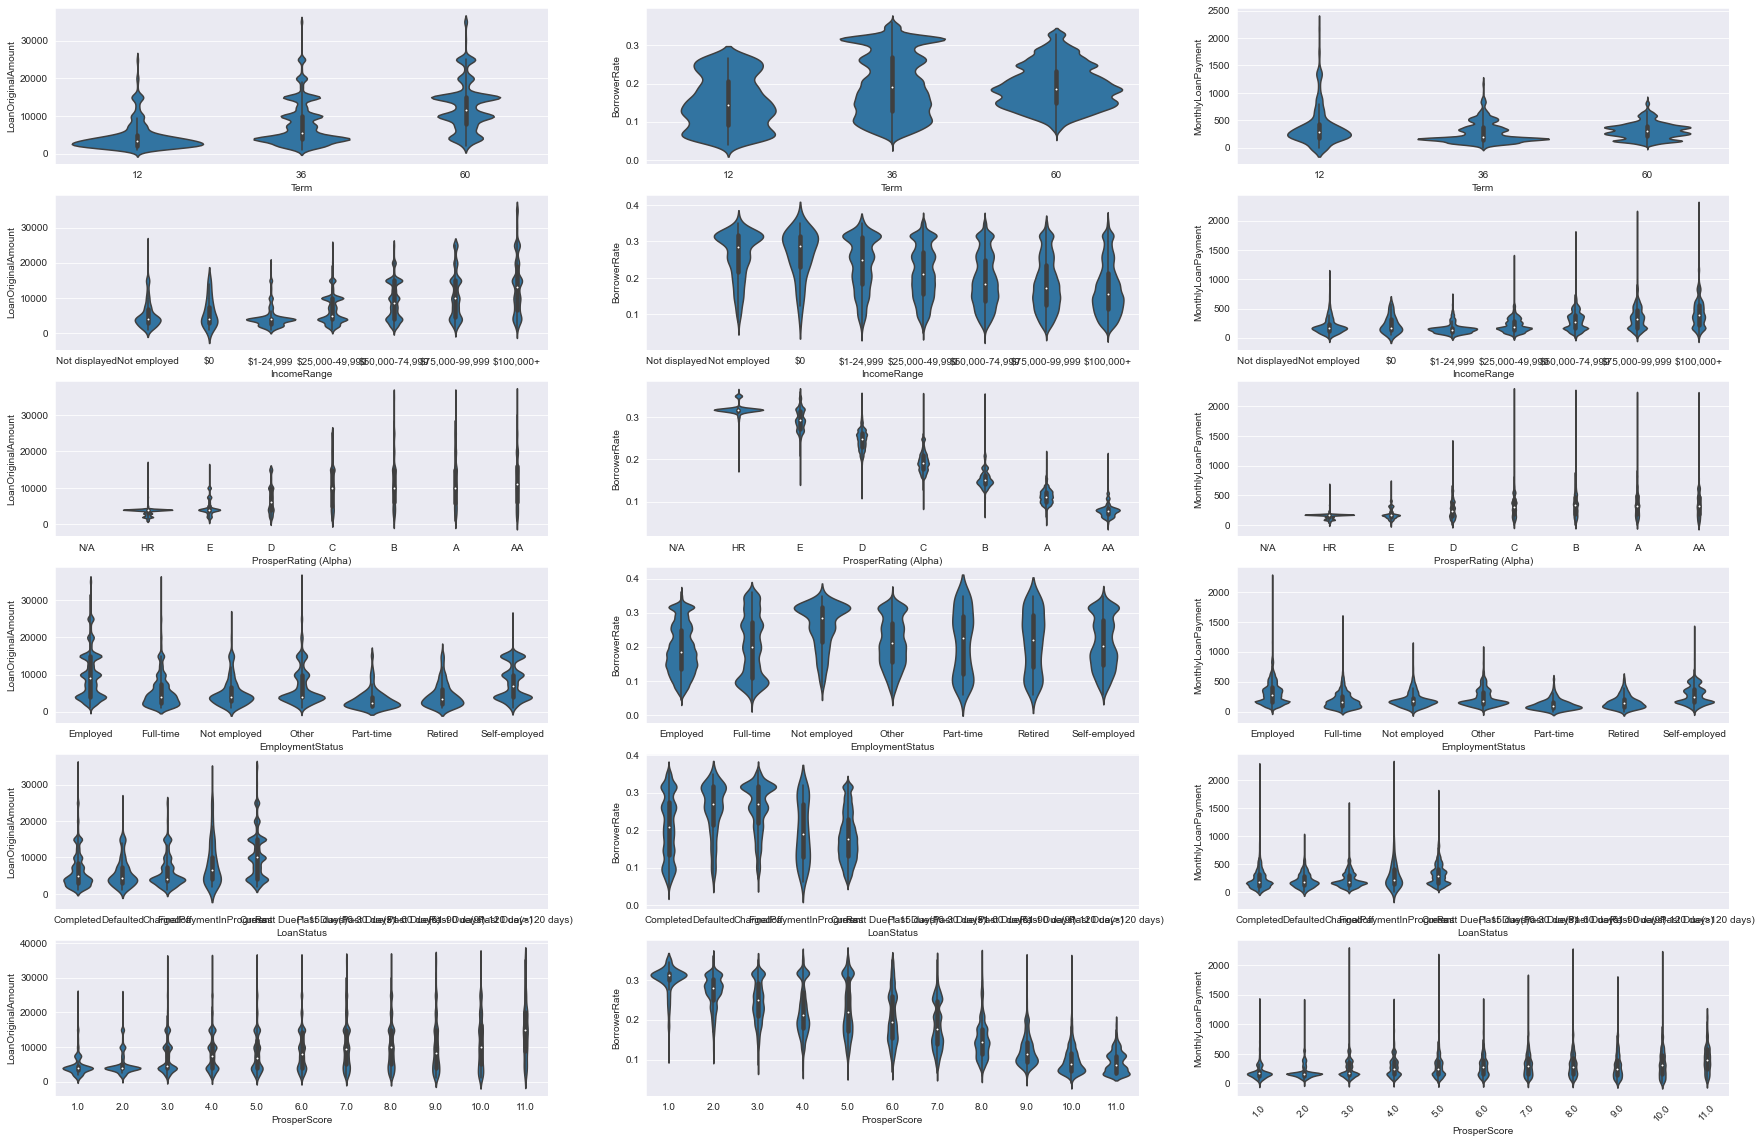

In [463]:
#plotting categorical variables against LoanOriginalAmount, BorrowerRate and MonthlyLoanPayment

fig, ax = plt.subplots(ncols= 3, nrows=6, figsize = [30,20])

for i in range(len(categorical_vars)):
    var = categorical_vars[i]
    sb.violinplot(data=loans, x=var, y='LoanOriginalAmount', ax=ax[i,0], color=base_color)
    sb.violinplot(data=loans, x=var, y= 'BorrowerRate', ax=ax[i,1], color=base_color)
    sb.violinplot(data=loans, x =var, y = 'MonthlyLoanPayment',ax=ax[i,2],color=base_color)
    plt.xticks(rotation = 45)
plt.show();



The violinplots show interesting relationship between the categorical variables and LoanOriginalAmount, BorrowerRate and MonthlyLoanPayment.
The violinplots show that the higher the Term of payment, the higher the loan and it the same with the BorrowerRate and the MonthlyLoanPayment. Also, the Borrowers with higher income range has the highest loan amount in contrast, they have the lowest BorrowerRate but have the highest MonthlyLoanPayment.
The loans with highest ProsperRating have the lowest BorrowerRate but has the highest MonthlyLoanPayment.
And also, loans with the lower risk have the higher LoanAmount, and loans with high BorrowerRate have high risk but have low risk loans have high MonthlyLoanPayment


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> LoanOriginalAmount was expected to be highly correlated with BorrowerRate, however, those, they had the expected relationship i.e. Negative Relationship, their relationship was a weak one. Moreover, the MonthlyLoanPayment was found to have a strong positive relationship with the LoanOriginalAmount which was to be expected. However, the high LoanOriginalAmount was surprisingly having the lower risk and small loan amount had the highest risk associated with i.e. a smaller ProsperScore. And high LoanAmounts have the best rating, and they have the longer term i.e. the higher the amount, the longer the term.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?


> Loans with high BorrowerRate have high risk and loans with high monthly payments have low risk and also, the higher the BorrowerRate the worst the rating. Also, longer terms are associated with high BorrowerRate and MonthlyLoanPayment.
Further, the BorrowerRate increases with IncomeRange which is expected because, the LoanAmount increases with IncomeRange, and we  know the lager the Loan amount, the higher the BorrowerRate


## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

> From the Bivariate investigation, I found out BorrowerRate, IncomeRange, MonthlyLoanPayment, ProsperScore, ProsperRating, Term have an interesting effect on the LoanAmount. Thus, I want to find out how these categorical features comes into the relationship between MonthlyLoanPayment, BorrowerRate and LoanOriginalAmount. Also, I need to find how IsBorrowerHomeowner comes into play with the relationships between the features

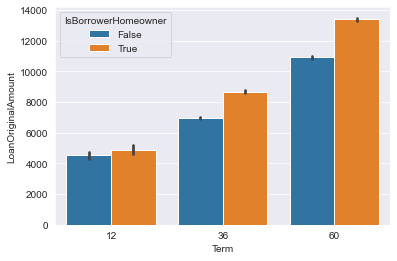

In [464]:
#plotting a clustered bar chart of the IBorrowerHomeowner and term of LoanOriginalAmount

ax = sb.barplot(data=loans, x = "Term", y="LoanOriginalAmount", hue="IsBorrowerHomeowner")


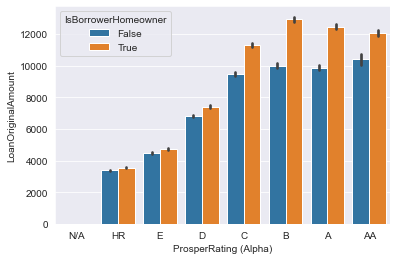

In [465]:
ax = sb.barplot(data=loans, x = "ProsperRating (Alpha)", y="LoanOriginalAmount", hue="IsBorrowerHomeowner")

C:\Users\johna\anaconda3\anaconda31\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)
C:\Users\johna\anaconda3\anaconda31\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)


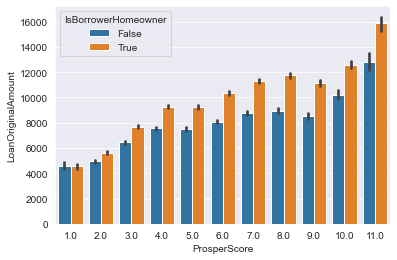

In [466]:
ax = sb.barplot(data=loans, x = "ProsperScore", y="LoanOriginalAmount", hue="IsBorrowerHomeowner")

C:\Users\johna\AppData\Local\Temp\ipykernel_12508\3690548080.py:2: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(label='ProsperScore');


Text(0, 0.5, 'LoanOriginalAmount')

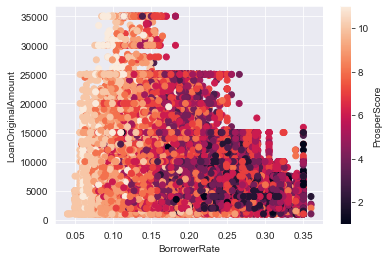

In [467]:
plt.scatter(data=loans, x = "BorrowerRate", y="LoanOriginalAmount", c="ProsperScore")
plt.colorbar(label='ProsperScore');
plt.xlabel('BorrowerRate')
plt.ylabel('LoanOriginalAmount')

C:\Users\johna\AppData\Local\Temp\ipykernel_12508\748740665.py:2: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(label='ProsperScore');


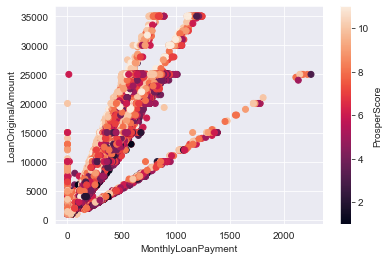

In [468]:
plt.scatter(data=loans, x = "MonthlyLoanPayment", y="LoanOriginalAmount", c="ProsperScore")
plt.colorbar(label='ProsperScore');
plt.xlabel('MonthlyLoanPayment')
plt.ylabel('LoanOriginalAmount');

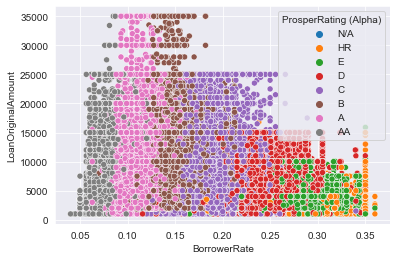

In [469]:
sb.scatterplot(data=loans, x = "BorrowerRate", y="LoanOriginalAmount", hue="ProsperRating (Alpha)")
plt.legend(loc = 1, title = "ProsperRating (Alpha)");

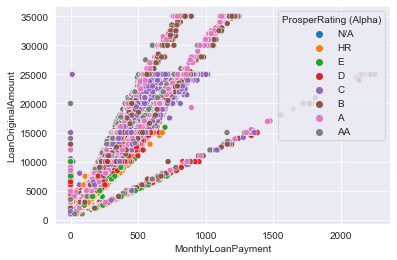

In [470]:
sb.scatterplot(data=loans, x = "MonthlyLoanPayment", y="LoanOriginalAmount", hue="ProsperRating (Alpha)")
plt.legend(loc = 1, title = "ProsperRating (Alpha)")

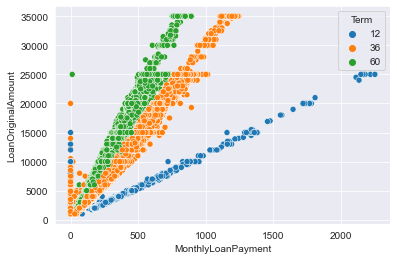

In [471]:
sb.scatterplot(data=loans, x = "MonthlyLoanPayment", y="LoanOriginalAmount", hue="Term")
plt.legend(loc = 1, title = "Term")

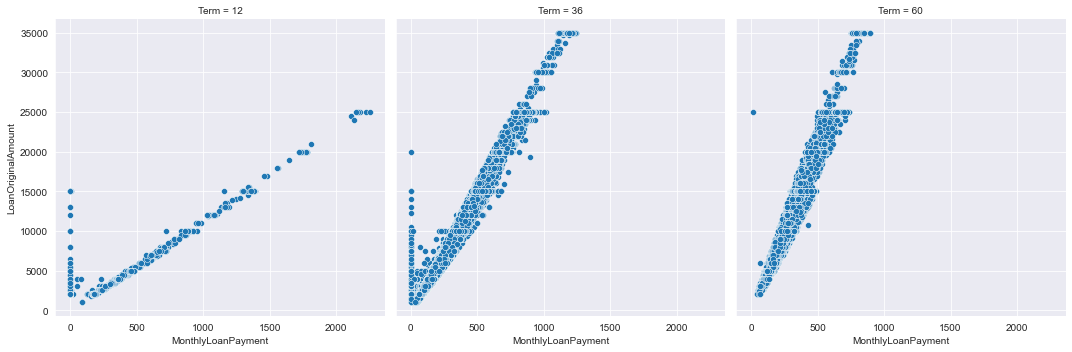

In [472]:
g = sb.FacetGrid(data=loans, col='Term',height=5 )
g.map(sb.scatterplot,'MonthlyLoanPayment' ,'LoanOriginalAmount')

From the facet plots it can be seen that the loan with longer Term rises faster the loans with short terms. From this it can be concluded that, the loans with longer Terms have smaller MonthlyLoanPayment as compared to loans with shorter term.

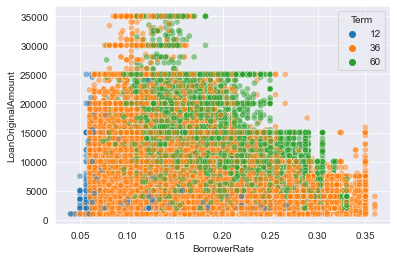

In [487]:
sb.scatterplot(data=loans, x = "BorrowerRate", y="LoanOriginalAmount", hue="Term", alpha=0.5)
plt.legend(loc = 1, title = "Term");

The 36-month term of loans seems to be much concentrated at the points where BorrowerRate is low and the loan amount is huge or where the BorrowerRate is high and the loan amount is small. However, the 60-month Term is concentrated in the upper right of the graph between 0.1 and 0.3 BorrowerRate and between an approximate LoanAmount of 75,000 and 300,000.

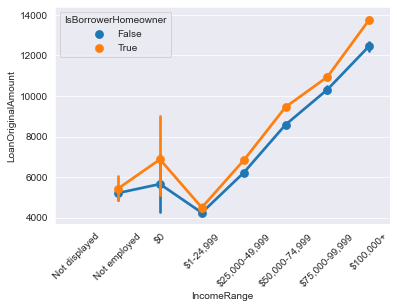

In [486]:
sb.pointplot(data=loans, x ="IncomeRange",y="LoanOriginalAmount",hue='IsBorrowerHomeowner');
plt.xticks(rotation=45);

Homeowners take larger loans than non Homeowners with the same income range. It can be seen that as the income range increases, the loa amount increases but that of the Homeowners increases faster than non homeowners.

In [ ]:
df = loans.copy()
df.set_index("LoanOriginationDate", inplace=True)
df = df.groupby(pd.Grouper(freq='M')).sum()
df[['DelinquenciesLast7Years','CurrentDelinquencies']].plot()


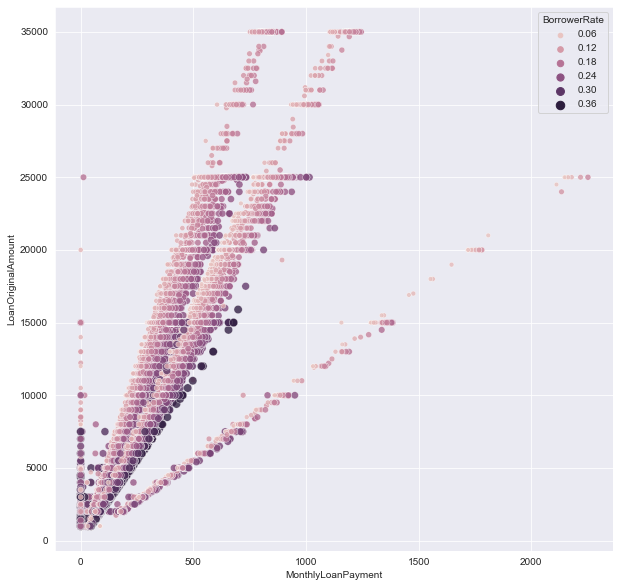

In [488]:
plt.figure(figsize=[10,10])
sb.scatterplot(data=loans, x='MonthlyLoanPayment',y='LoanOriginalAmount',hue="BorrowerRate",size='BorrowerRate',alpha=0.8);

The MonthlyLoanPayment increases as the LoanOriginalAmount also increases, and it can be seen that the low BorrowerRates are concentrated on the upper left side which shows Loans with smaller MonthlyLoanPayment. As the LoanOriginalAmount gets larger, the BorrowerRate can be seen becoming dimmer, i.e. smaller but with the MonthlyPayment increasing.Which means, loans with larger amount have higher  MonthlyLoanPayment with smaller BorrowerRate as compared to loans with moderate to small LoanOriginalAmount that has smaller MonthlyLoanPayment but larger BorrowerRate But as the MonthlyLoanPayment increases, the BorrowerRate decreases.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Through my thorough investigation in the relationship between  LoanOriginalAmount, MonthlyLoanPayment and BorrowerRate, the multivariate plots showed that, loans with large LoanOriginalAmount have increasing MonthlyLoanPayment but low BorrowerRate. However, the BorrowerRate does not increase as fast as the MonthlyLoanPayment increases as the LoanOriginalAmountIncreases and vice versa.

### Were there any interesting or surprising interactions between features?

> Taking a look at the IsBorrowerHomeowner feature, with the other categorical and numeric features, there seem to be a trend where the Homeowners always have the upper hand. Taking a look at the ProsperScore and LoanOriginalAmount between the Homeowners and non homeowners, the homeowners seem to have the largest frequency in each score point. And Also, homeowners have larger LoanOriginalAmount as compared to non homeowners with the same IncomeRange.
>Furthermore, the scatterplots of LoanOriginalAmount and BorrowerRate with the third feature as ProsperRating (Alpha) and ProsperScore, revealed that, loans with Larger LoanOriginalAmount and lower BorrowerRate have the best (highest) score and have the best ProsperRating and same can be said in the case of LoanOriginalAmount and the MonthlyPayment and ProsperRating (Alpha) and ProsperScore. The loans with large LoanOriginalAmount with the small MonthlyLoanPayment have the best score and rating.

## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.
> The ProsperLoan data investigation was done by taking 14 features from 81 available features from the dataset and those features include:
1. LoanOriginationDate
2. Term
3. BorrowerRate
4. LoanOriginalAmount
5. IncomeRange
6. CurrentDelinquencies
7. DelinquenciesLast7years
8. ProsperRating (Alpha)
9. Occupation
10. EmploymentStatus
11. IsBorrowerHomeowner
12. MonthlyLoanPayment
13. LoanStatus
14. ProsperScore

The Occupation feature was later dropped due to the vagueness of some its values.
The Data type of LoanOriginationDate was converted into numpy datetime
and EmploymentStatus, ProsperScore, ProsperRating(Alpha), LoanStatus, IncomeRange and Term was converted into categorical datatypes.

The dataset was trimmed down to loans after July 2009 because the loans before July 2009 have no ProsperScore and ProsperRating (Alpha) and to make sure our analysis is unbiased in this respect, the loans before July 2009 were dropped.

Further, from my investigation, I found out that, the BorrowerRate explains only 41 percent variability in the LoanOriginalAmount but the MonthlyLoanPayment having approximately 92 percent correlation coefficient with the LoanOriginalAmount. Which turns out to be surprising because I expected BorrowerRate to have such a strong relationship with the LoanOriginalAmount because, the BorrowerRate is the cost of taking the Loan, so the higher the Rate the more expensive it is to take the loan.
I found out that as the LoanOriginalAmount increases, so does the MonthlyLoanPayment but the BorrowerRate decreases. And looking at this in terms of the Term, the loans with the longer Term has small MonthlyPayment but has a high BorrowerRate.

Lastly, looking into the Delinquencies, I found out the current Delinquencies is much lower than last 7 years.